<a href="https://colab.research.google.com/github/KostantinDubnitskyi/Methodd/blob/main/%D0%9B%D1%80_2_(%D0%94%D1%83%D0%B1%D0%BD%D0%B8%D1%86%D1%8C%D0%BA%D0%B8%D0%B9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Лабораторна робота №2
#Відокрелення коренів
import numpy as np

def f(x):
    return 6*x**4 + 8*x**3 - 24*x**2 - 7

def find_segments():
    search_range = np.arange(-10, 10, 1)

    a = None
    previous_x = None
    current_x = None
    segments = []

    for x in search_range:
        x = round(x, 4)
        current_x = f(x)
        if previous_x is not None and previous_x * current_x < 0:
            segments.append((a, x))
        a = x
        previous_x = current_x
    return segments

segments = find_segments()
for a, b in segments:
    print(f'знайдені сегменти: [{a}, {b}]')

знайдені сегменти: [-3, -2]
знайдені сегменти: [1, 2]


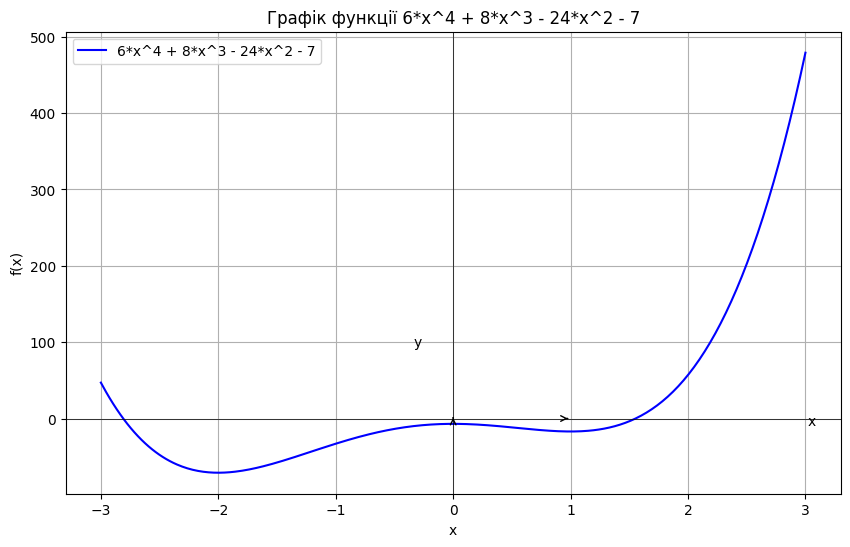

In [ ]:
#Лабораторна робота №2
#Метод хорд
import numpy as np
import matplotlib.pyplot as plt

# Визначення функції
def f(x):
    return 6*x**4 + 8*x**3 - 24*x**2 - 7

# Генерація значень x
x = np.linspace(-3, 3, 400)

# Генерація значень y
y = f(x)

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='6*x^4 + 8*x^3 - 24*x^2 - 7', color='blue')
plt.title('Графік функції 6*x^4 + 8*x^3 - 24*x^2 - 7')
plt.xlabel('x')
plt.ylabel('f(x)')

# Додавання осей з стрілками
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Додавання стрілок на осях
plt.annotate('', xy=(1, 0), xytext=(0.95, 0), arrowprops=dict(arrowstyle='->', color='black'))
plt.annotate('', xy=(0, 1), xytext=(0, 0.95), arrowprops=dict(arrowstyle='->', color='black'))

# Додавання позначок осей
plt.text(3.05, -4, 'x', ha='center', va='center')
plt.text(-0.3, 100, 'y', ha='center', va='center')

# Додавання сітки
plt.grid(True)

# Додавання легенди
plt.legend()

# Показати графік
plt.show()

In [ ]:
#Лабораторна робота №2
#Метод хорд та метод відокрелення коренів
import numpy as np
import numdifftools as nd

# Визначення функції
def f(x):
    return 6*x**4 + 8*x**3 - 24*x**2 - 7

def rec(a, b, eps):  # метод половинного ділення
    while abs(a - b) > eps:
        if f(a) * f((a + b) / 2) < 0:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
    x = (a + b) / 2
    print('x= ', round(x, 5), '-Метод Відокрелення коренів')

def hord(a, b, eps):  # метод хорд
    derivative_f = nd.Derivative(f, n=1)
    if f(a) * derivative_f(a) > 0:
        x0 = a
        xi = b
    else:
        x0 = b
        xi = a
    xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    while abs(xi_1 - xi) > eps:
        xi = xi_1
        if f(xi) - f(x0) == 0:
            break
        xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    print('x= ', round(xi_1, 5), '-Метод Хорд')

if __name__ == "__main__":
    a1, b1 = -2, -1
    a2, b2 = 0, 1
    eps = 0.001
    print("Розв'язки на відрізку [-2,-1]")
    rec(a1, b1, eps)
    hord(a1, b1, eps)
    print("\nРозв'язки на відрізку [0,1]")
    rec(a2, b2, eps)
    hord(a2, b2, eps)

Розв'язки на відрізку [-2,-1]
x=  -1.00049   -Метод Відокрелення коренів
x=  1.5528   -Метод Хорд

Розв'язки на відрізку [0,1]
x=  0.99951   -Метод Відокрелення коренів
x=  1.0   -Метод Хорд
